In [2]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#행정구역별 인구수
df = pd.read_excel('행정구역_202401.xlsx', skiprows=1)
df.head()

,행정구역(시군구)별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,51313912,25558944,25754968
1,서울특별시,9384325,4538354,4845971
2,종로구,139378,67240,72138
3,중구,121322,58651,62671
4,용산구,212175,101793,110382


In [4]:
df1 = df.copy()
df1.columns = ['행정구역2', '총인구수', '남자인구수', '여자인구수']
df1['행정구역1'] = ''
df1.head()

,행정구역2,총인구수,남자인구수,여자인구수,행정구역1
0,전국,51313912,25558944,25754968,
1,서울특별시,9384325,4538354,4845971,
2,종로구,139378,67240,72138,
3,중구,121322,58651,62671,
4,용산구,212175,101793,110382,


In [5]:
df2 = df1.copy()
cols = list(df1.columns)
df2 = df1[[cols[-1]] + cols[0:-1]] #다른방법 : df2 = df1[['행정구역1', '행정구역2', ...]]
df2.head()

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,,전국,51313912,25558944,25754968
1,,서울특별시,9384325,4538354,4845971
2,,종로구,139378,67240,72138
3,,중구,121322,58651,62671
4,,용산구,212175,101793,110382


In [6]:
sidos = ['특별시', '광역시', '자치시', '경기도', '남도', '북도', '자치도']
for i in range(1, len(df2)):
    for sido in sidos:
        if sido in df2.loc[i, '행정구역2']:
            df2.loc[i, '행정구역1'] = df2.loc[i, '행정구역2']
            df2.loc[i, '행정구역2'] = '소계'
df2

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,,전국,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,,종로구,139378,67240,72138
3,,중구,121322,58651,62671
4,,용산구,212175,101793,110382
...,...,...,...,...,...
288,,거창군,59909,29480,30429
289,,합천군,41096,20094,21002
290,제주특별자치도,소계,674353,337578,336775
291,,제주시,490888,245197,245691


In [7]:
for i in range(2, len(df)):
    if df2.loc[i, '행정구역1'] == '':
        df2.loc[i, '행정구역1'] = df2.loc[i-1, '행정구역1']
df2.loc[0, '행정구역1'] = '전국'
df2.loc[0, '행정구역2'] = '합계'
df2['행정구역2']=df2['행정구역2'].str.strip()
df2

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,전국,합계,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,서울특별시,종로구,139378,67240,72138
3,서울특별시,중구,121322,58651,62671
4,서울특별시,용산구,212175,101793,110382
...,...,...,...,...,...
288,경상남도,거창군,59909,29480,30429
289,경상남도,합천군,41096,20094,21002
290,제주특별자치도,소계,674353,337578,336775
291,제주특별자치도,제주시,490888,245197,245691


In [8]:
df2.to_csv('행정구역별인구수.csv')

In [9]:
df3 = pd.read_csv('행정구역별인구수.csv', index_col=0)
df3.head()

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
0,전국,합계,51313912,25558944,25754968
1,서울특별시,소계,9384325,4538354,4845971
2,서울특별시,종로구,139378,67240,72138
3,서울특별시,중구,121322,58651,62671
4,서울특별시,용산구,212175,101793,110382


In [10]:
df3['행정구역2'].unique()

array(['합계', '소계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구',
       '동구', '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구',
       '연제구', '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '군위군', '중구영종출장소',
       '중구용유출장소', '미추홀구', '연수구', '남동구', '부평구', '계양구', '서구검단출장소', '강화군',
       '옹진군', '광산구', '유성구', '대덕구', '울주군', '세종시', '수원시', '장안구', '권선구',
       '팔달구', '영통구', '성남시', '수정구', '중원구', '분당구', '의정부시', '안양시', '만안구',
       '동안구', '부천시', '원미구', '소사구', '오정구', '광명시', '평택시', '송탄출장소', '안중출장소',
       '동두천시', '안산시', '상록구', '단원구', '고양시', '덕양구', '일산동구', '일산서구', '과천시',
       '구리시', '남양주시', '풍양출장소', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시',
       '처인구', '기흥구', '수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '화성시동부출장소',
       '화성시동탄출장소', '광주시', '양주시', '포천시', '여주시', '연천군', '가평군', '양평군', '춘천시',
       '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시', '홍천군', '횡

In [11]:
filt = df2['행정구역2'] == '소계'
df3 = df2[filt]
df3 = df3.sort_values('행정구역1')
df3

,행정구역1,행정구역2,총인구수,남자인구수,여자인구수
145,강원특별자치도,소계,1526243,767496,758747
88,경기도,소계,13635250,6857867,6777383
263,경상남도,소계,3248703,1636010,1612693
238,경상북도,소계,2551370,1288999,1262371
68,광주광역시,소계,1418241,700377,717864
44,대구광역시,소계,2373844,1166110,1207734
74,대전광역시,소계,1441562,719008,722554
27,부산광역시,소계,3290964,1603859,1687105
1,서울특별시,소계,9384325,4538354,4845971
86,세종특별자치시,소계,386944,192704,194240


In [12]:
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

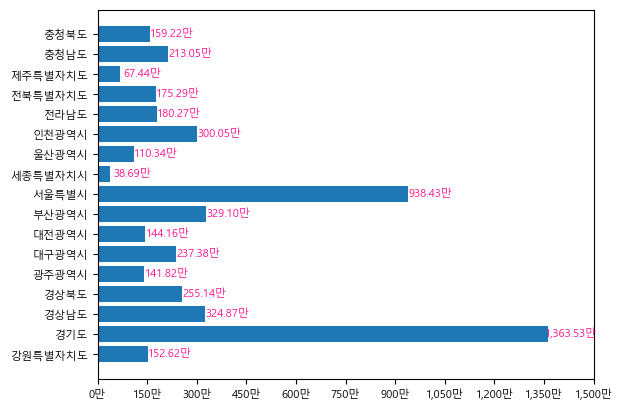

In [13]:
plt.rc('font', size='8')
plt.barh(df3['행정구역1'], df3['총인구수']/10000)

xticks = [i for i in range(0, 1501, 150)]
plt.xticks(xticks, [f'{x:,}만' for x in xticks])

for i, p in enumerate(df3['총인구수']/10000):
    plt.text(p+67, i-0.1, f'{p:,.02f}만', ha='center', color = 'deeppink')

plt.show()

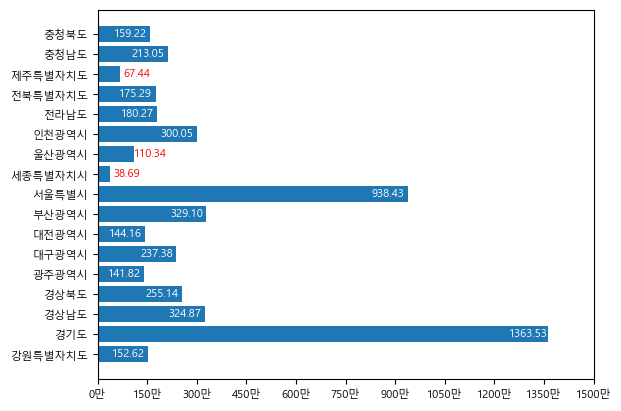

In [23]:
plt.rc('font', size='8')
plt.barh(df3['행정구역1'], df3['총인구수']/10000)

xticks = [i for i in range(0, 1501, 150)]
plt.xticks(xticks, [f'{x}만' for x in xticks])

for idx, p in enumerate(df3['총인구수']/10000):
    if p > 1103402/10000:
        plt.text(p-60, idx-0.1, f'{p:.02f}', ha='center', color='w')
    else:
        plt.text(p+50, idx-0.1, f'{p:.02f}', ha='center', color='red')

plt.show()